# Assignment 1

## Exploratory Data Analysis


### Game recomendations in Steam 

Analyzing Steam game data is fascinating for me as a gamer who frequently uses Steam. It provides insights into trends, pricing, and user reviews, enriching my understanding of the gaming landscape. This analysis is a personal exploration, offering a unique perspective on the games I enjoy and the broader Steam community, potentially enhancing my gaming experiences. 
My goals are: 
1. Explore trends in pricing and how it correlates with game popularity
2. Investigate the relationship between pricing, reviews, and sales
3. Analyze how certain attributes contribute to a game's popularity

In [1]:
# Importing all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from collections import Counter
from datetime import datetime
pd.set_option('display.float_format', lambda x: '%.3f' % x)

<p>The dataset consists of three main entities:</p>
<ul>
<li><a target="_blank" href="https://www.kaggle.com/datasets/antonkozyriev/game-recommendations-on-steam?select=games.csv">games.csv</a> - a table of games (or add-ons) information on ratings, pricing in US dollars $, release date, etc. A piece of extra non-tabular details on games, such as descriptions and tags, is in a <a target="_blank" href="https://www.kaggle.com/datasets/antonkozyriev/game-recommendations-on-steam?select=games_metadata.json">metadata file</a>;</li>
<li><a target="_blank" href="https://www.kaggle.com/datasets/antonkozyriev/game-recommendations-on-steam?select=users.csv">users.csv</a> - a table of user profiles' public information: the number of purchased products and reviews published;</li>
<li><a target="_blank" href="https://www.kaggle.com/datasets/antonkozyriev/game-recommendations-on-steam?select=recommendations.csv">recommendations.csv</a> - a table of user reviews: whether the user recommends a product. The table represents a many-many relation between a game entity and a user entity.</li>
</ul>

In [2]:
# Loading the data
games_data = pd.read_csv('./games.csv')
recommendations_data = pd.read_csv('./recommendations.csv')
users_data = pd.read_csv('./users.csv')

In [3]:
# Looking at our data
games_data.head(5)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.990,9.990,0.000,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.990,2.990,0.000,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.990,14.990,0.000,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.990,14.990,0.000,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.990,11.990,0.000,True


In [4]:
recommendations_data.head(5)

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.300,51580,0
1,304390,4,0,2017-02-17,False,11.500,2586,1
2,1085660,2,0,2019-11-17,True,336.500,253880,2
3,703080,0,0,2022-09-23,True,27.400,259432,3
4,526870,0,0,2021-01-10,True,7.900,23869,4


In [5]:
users_data.head(5)

,user_id,products,reviews
0,7090995,359,0
1,13511788,156,1
2,8444727,329,4
3,4632233,176,3
4,4968781,98,2


In [6]:
# Combining the data into one dataframe 
data = pd.merge(games_data, recommendations_data) 
games = pd.merge(data, users_data)

In [7]:
games.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,...,steam_deck,helpful,funny,date,is_recommended,hours,user_id,review_id,products,reviews
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.990,...,True,2,0,2015-05-30,True,0.400,3369378,14254690,53,2
1,548570,RAGE 2,2019-05-13,True,False,False,Mixed,62,12779,39.990,...,True,3,0,2019-09-24,True,0.200,3369378,35063870,53,2
2,247910,Sniper Elite: Nazi Zombie Army 2,2013-10-31,True,False,False,Very Positive,84,2858,14.990,...,True,0,0,2014-03-01,True,3.100,3369378,33238060,53,2
3,354380,Assassin’s Creed® Chronicles: China,2015-04-21,True,False,False,Mostly Positive,73,2954,9.990,...,True,190,46,2015-04-21,True,15.500,3369378,29395335,53,2
4,35720,Trine 2: Complete Story,2013-06-06,True,True,True,Overwhelmingly Positive,95,14180,19.990,...,True,0,0,2014-04-14,True,8.000,3369378,41012521,53,2


In [8]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39632960 entries, 0 to 39632959
Data columns (total 22 columns):
 #   Column          Dtype  
---  ------          -----  
 0   app_id          int64  
 1   title           object 
 2   date_release    object 
 3   win             bool   
 4   mac             bool   
 5   linux           bool   
 6   rating          object 
 7   positive_ratio  int64  
 8   user_reviews    int64  
 9   price_final     float64
 10  price_original  float64
 11  discount        float64
 12  steam_deck      bool   
 13  helpful         int64  
 14  funny           int64  
 15  date            object 
 16  is_recommended  bool   
 17  hours           float64
 18  user_id         int64  
 19  review_id       int64  
 20  products        int64  
 21  reviews         int64  
dtypes: bool(5), float64(4), int64(9), object(4)
memory usage: 5.2+ GB


In [9]:
# Dropping the columns that are not needed for further analysis
columns_to_drop = ['price_original', 'discount', 'user_id', 'review_id', 'funny', 
                   'helpful', 'date', 'hours', 'products','reviews']
games = games.drop(columns_to_drop, axis=1)

In [10]:
# Dropping duplicates
games.drop_duplicates(inplace=True)

In [11]:
games.to_csv('games1.csv', index=False)

In [12]:
games1 = pd.read_csv('./games1.csv')
games1.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,steam_deck,is_recommended
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.990,True,True
1,548570,RAGE 2,2019-05-13,True,False,False,Mixed,62,12779,39.990,True,True
2,247910,Sniper Elite: Nazi Zombie Army 2,2013-10-31,True,False,False,Very Positive,84,2858,14.990,True,True
3,354380,Assassin’s Creed® Chronicles: China,2015-04-21,True,False,False,Mostly Positive,73,2954,9.990,True,True
4,35720,Trine 2: Complete Story,2013-06-06,True,True,True,Overwhelmingly Positive,95,14180,19.990,True,True


In [13]:
games1.describe()

,app_id,positive_ratio,user_reviews,price_final
count,71212.000,71212.000,71212.000,71212.000
mean,962386.752,75.752,2497.417,8.510
std,547393.905,17.824,47852.412,10.902
min,10.000,0.000,10.000,0.000
25%,502187.500,66.000,23.000,0.990
50%,883875.000,80.000,66.000,4.990
75%,1383255.000,90.000,312.000,11.990
max,2253290.000,100.000,7494460.000,269.990


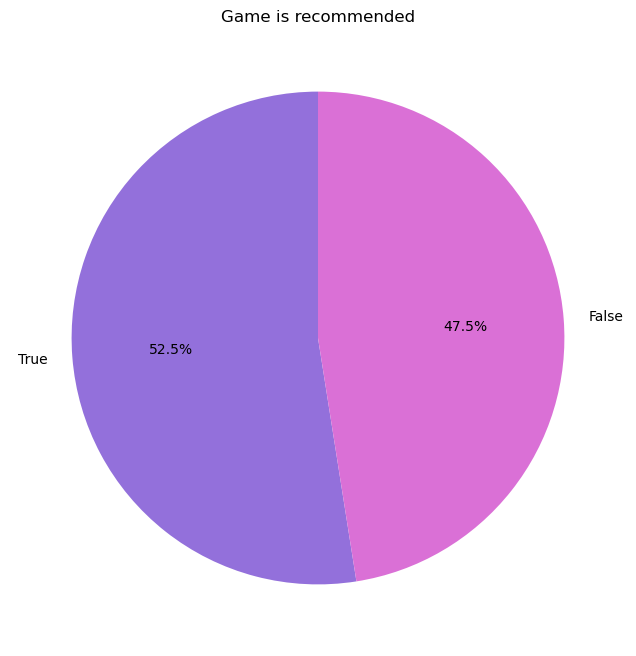

In [14]:
# Counting occurrences of each category
category_counts = games1['is_recommended'].value_counts()
colors = ['mediumpurple', 'orchid']
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors = colors)
plt.title('Game is recommended')
plt.show()

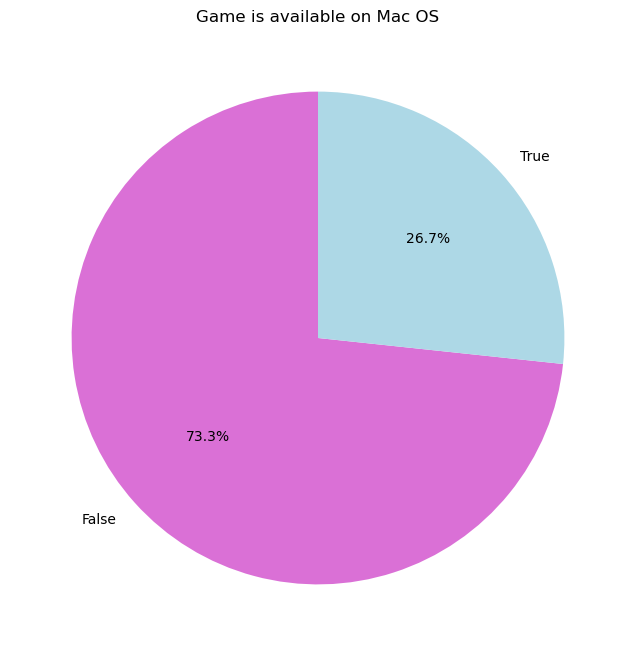

In [15]:
# Counting occurrences of each category
category_counts_1 = games1['mac'].value_counts()
colors = ['orchid', 'lightblue']
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts_1, labels=category_counts_1.index, autopct='%1.1f%%', startangle=90,colors = colors)
plt.title('Game is available on Mac OS')
plt.show()

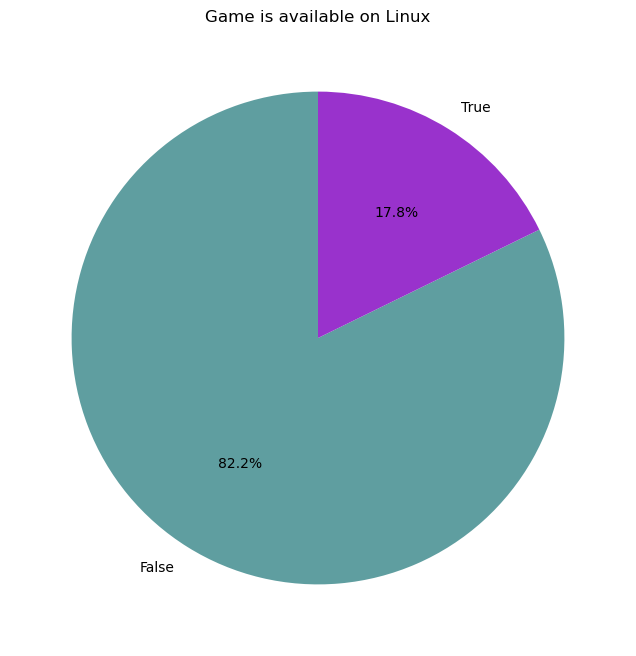

In [16]:
# Counting occurrences of each category
category_counts_2 = games1['linux'].value_counts()
colors = ['cadetblue', 'darkorchid']
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts_2, labels=category_counts_2.index, autopct='%1.1f%%', startangle=90, colors = colors)
plt.title('Game is available on Linux')
plt.show()

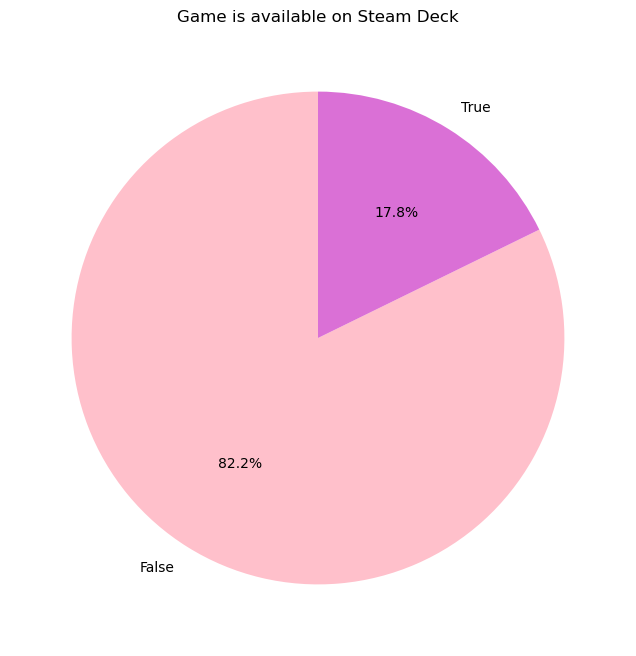

In [17]:
# Counting occurrences of each category
category_counts_3 = games1['steam_deck'].value_counts()
colors = ['pink', 'orchid']
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts_2, labels=category_counts_2.index, autopct='%1.1f%%', startangle=90, colors = colors)
plt.title('Game is available on Steam Deck')
plt.show()

In [18]:
# Counting percentage of ratings
percentage_distribution = games1['rating'].value_counts(normalize=True) * 100

# Printing the result
print(percentage_distribution.map('{:.4f}%'.format))

rating
Very Positive              29.0049%
Mixed                      25.8805%
Positive                   19.1077%
Mostly Positive            18.6696%
Mostly Negative             3.7887%
Overwhelmingly Positive     2.8240%
Negative                    0.6207%
Very Negative               0.0843%
Overwhelmingly Negative     0.0197%
Name: proportion, dtype: object


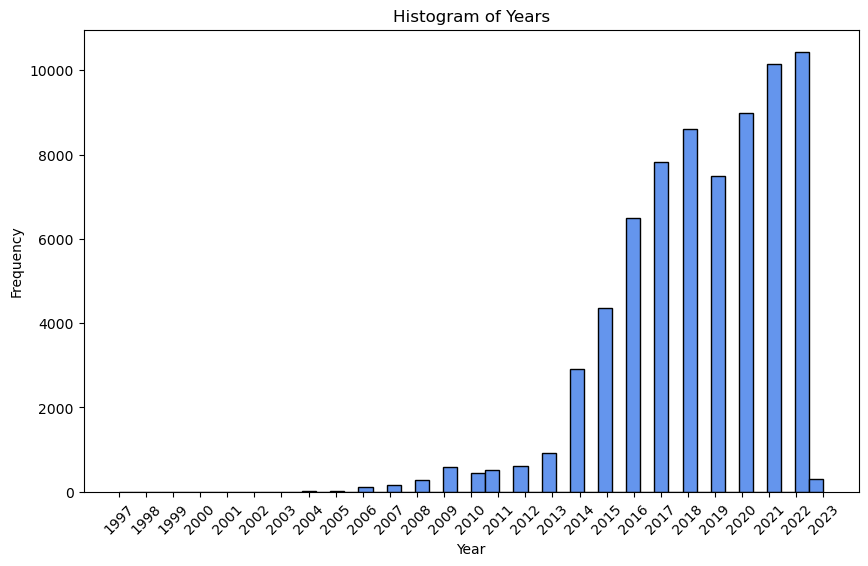

In [19]:
# Converting the 'date_release' to a datetime format
games1['date_release'] = pd.to_datetime(games1['date_release'])

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(games1['date_release'].dt.year, bins=50, edgecolor='black', color='cornflowerblue')  # Используем .dt.year
plt.title('Histogram of Years')
plt.xlabel('Year')
plt.ylabel('Frequency')

# Устанавливаем шаг оси x, чтобы отображать каждый год
plt.xticks(range(games1['date_release'].dt.year.min(), games1['date_release'].dt.year.max() + 1), rotation=45)

plt.show()

In [20]:
most_frequent_year = games1['date_release'].dt.year.mode()[0]
print("The most frequent year:", most_frequent_year)

The most frequent year: 2022


In [21]:
# Counting how many games per year were released
games_per_year = games.groupby(games1['date_release'].dt.year).size().reset_index(name='number_of_games')

# Printing the results
print(games_per_year)


    date_release  number_of_games
0       1997.000                4
1       1999.000                2
2       2000.000                3
3       2001.000                3
4       2002.000                2
5       2003.000                2
6       2004.000                6
7       2005.000                2
8       2006.000               45
9       2007.000               89
10      2008.000              133
11      2009.000              264
12      2010.000              202
13      2011.000              228
14      2012.000              300
15      2013.000              437
16      2014.000             1052
17      2015.000             1293
18      2016.000             1717
19      2017.000             1824
20      2018.000             1821
21      2019.000             1605
22      2020.000             1844
23      2021.000             1950
24      2022.000             1811
25      2023.000               53


In [22]:
# Looking at the unique values in column 'rating'
unique_ratings = games1['rating'].unique()

# Printing unique values
print("Unique values in column 'rating':")
print(unique_ratings)

Unique values in column 'rating':
['Very Positive' 'Mixed' 'Mostly Positive' 'Overwhelmingly Positive'
 'Mostly Negative' 'Positive' 'Very Negative' 'Negative'
 'Overwhelmingly Negative']


/Users/polinabykova/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/polinabykova/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


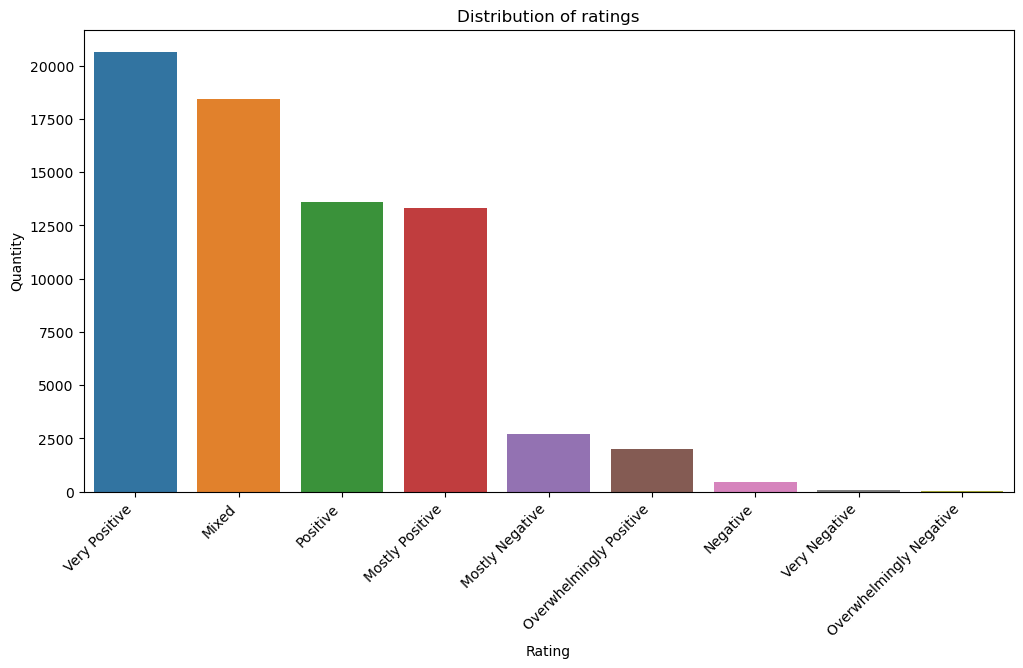

In [23]:
# Creating a bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='rating', data=games1, order=games1['rating'].value_counts().index)

# Rotating captions on the x-axis for better readability
plt.xticks(rotation=45, ha='right')

# Adding captions and header
plt.xlabel('Rating')
plt.ylabel('Quantity')
plt.title('Distribution of ratings')

# Displaying the plot
plt.show()

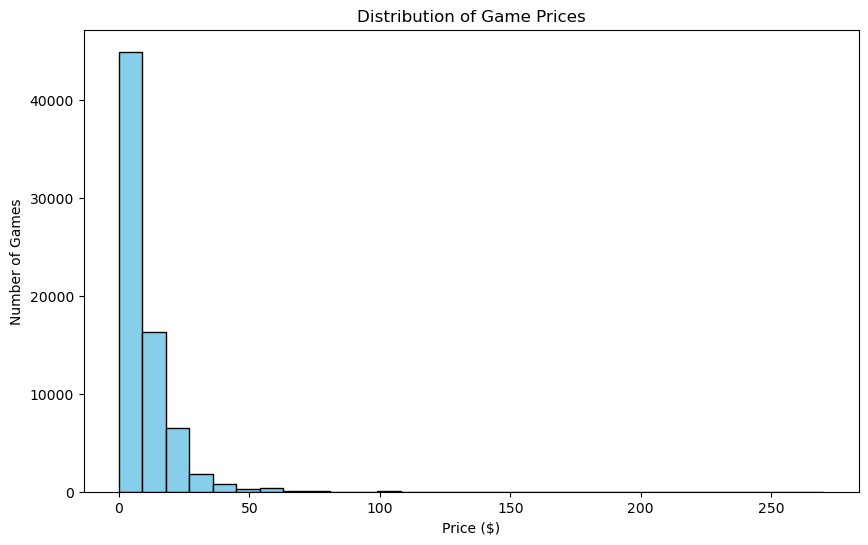

In [24]:
# Exploring the Distribution of Game Prices
plt.figure(figsize=(10, 6))
plt.hist(games1['price_final'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Game Prices')
plt.xlabel('Price ($)')
plt.ylabel('Number of Games')
plt.show()

In [25]:
# Calculating Average Price
average_price = games1['price_final'].mean()
print(f'Average Game Price: ${average_price:.2f}')

Average Game Price: $8.51


In [26]:
# Correlation with Positive Ratio
correlation_price_positive_ratio = games1['price_final'].corr(games1['positive_ratio'])
print(f'Correlation between Price and Positive Ratio: {correlation_price_positive_ratio:.2f}')

Correlation between Price and Positive Ratio: 0.05
